#This notebook is to load and visualize the raw EEG Data before processing further.

In [ ]:
!pip install mne
!pip install pymatreader
!pip install --upgrade yasa
!pip install mat73
import mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 39.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 KB 24.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) 

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from mat73 import loadmat

import pickle

from sklearn.utils import shuffle
from scipy import signal
from scipy.fft import fftshift
from mne.time_frequency import psd_array_multitaper
from scipy.integrate import simps
from yasa import sliding_window

import tensorflow as tf
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
cd /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy

/drive/MyDrive/Computational Neuroscience/PD_Data/Healthy


In [ ]:
ls


sub-hc10_ses-hc_task-rest_eeg.bdf   sub-pd14_ses-on_task-rest_eeg.bdf
sub-hc18_ses-hc_task-rest_eeg.bdf   sub-pd16_ses-off_task-rest_eeg.bdf
sub-hc1_ses-hc_task-rest_eeg.bdf    sub-pd16_ses-on_task-rest_eeg.bdf
sub-hc20_ses-hc_task-rest_eeg.bdf   sub-pd17_ses-off_task-rest_eeg.bdf
sub-hc21_ses-hc_task-rest_eeg.bdf   sub-pd17_ses-on_task-rest_eeg.bdf
sub-hc24_ses-hc_task-rest_eeg.bdf   sub-pd19_ses-off_task-rest_eeg.bdf
sub-hc25_ses-hc_task-rest_eeg.bdf   sub-pd19_ses-on_task-rest_eeg.bdf
sub-hc29_ses-hc_task-rest_eeg.bdf   sub-pd22_ses-off_task-rest_eeg.bdf
sub-hc2_ses-hc_task-rest_eeg.bdf    sub-pd22_ses-on_task-rest_eeg.bdf
sub-hc30_ses-hc_task-rest_eeg.bdf   sub-pd23_ses-off_task-rest_eeg.bdf
sub-hc31_ses-hc_task-rest_eeg.bdf   sub-pd23_ses-on_task-rest_eeg.bdf
sub-hc32_ses-hc_task-rest_eeg.bdf   sub-pd26_ses-off_task-rest_eeg.bdf
sub-hc33_ses-hc_task-rest_eeg.bdf   sub-pd26_ses-on_task-rest_eeg.bdf
sub-hc4_ses-hc_task-rest_eeg.bdf    sub-pd28_ses-off_task-rest_eeg.bdf
sub-hc7_ses-h

In [ ]:
os.chdir("/content/drive/MyDrive/Computational Neuroscience/PD_Data/Healthy")
os.getcwd()

OSError: ignored

In [ ]:
raw_data = glob.glob('*.bdf')
raw_data.sort()
len(raw_data), raw_data

(46,
 ['sub-hc10_ses-hc_task-rest_eeg.bdf',
  'sub-hc18_ses-hc_task-rest_eeg.bdf',
  'sub-hc1_ses-hc_task-rest_eeg.bdf',
  'sub-hc20_ses-hc_task-rest_eeg.bdf',
  'sub-hc21_ses-hc_task-rest_eeg.bdf',
  'sub-hc24_ses-hc_task-rest_eeg.bdf',
  'sub-hc25_ses-hc_task-rest_eeg.bdf',
  'sub-hc29_ses-hc_task-rest_eeg.bdf',
  'sub-hc2_ses-hc_task-rest_eeg.bdf',
  'sub-hc30_ses-hc_task-rest_eeg.bdf',
  'sub-hc31_ses-hc_task-rest_eeg.bdf',
  'sub-hc32_ses-hc_task-rest_eeg.bdf',
  'sub-hc33_ses-hc_task-rest_eeg.bdf',
  'sub-hc4_ses-hc_task-rest_eeg.bdf',
  'sub-hc7_ses-hc_task-rest_eeg.bdf',
  'sub-hc8_ses-hc_task-rest_eeg.bdf',
  'sub-pd11_ses-off_task-rest_eeg.bdf',
  'sub-pd11_ses-on_task-rest_eeg.bdf',
  'sub-pd12_ses-off_task-rest_eeg.bdf',
  'sub-pd12_ses-on_task-rest_eeg.bdf',
  'sub-pd13_ses-off_task-rest_eeg.bdf',
  'sub-pd13_ses-on_task-rest_eeg.bdf',
  'sub-pd14_ses-off_task-rest_eeg.bdf',
  'sub-pd14_ses-on_task-rest_eeg.bdf',
  'sub-pd16_ses-off_task-rest_eeg.bdf',
  'sub-pd16_ses-on_t

In [ ]:
raw_list = []
for raw_data in raw_data:
    raw = mne.io.read_raw_bdf(raw_data)
    raw_list.append(raw)

# concatenate the raw data from all files
raw_all = mne.concatenate_raws(raw_list)

Extracting EDF parameters from /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy/sub-hc10_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy/sub-hc18_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy/sub-hc1_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy/sub-hc20_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy/sub-hc21_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info 

In [ ]:
raw_all


<RawEDF | sub-hc10_ses-hc_task-rest_eeg.bdf, 41 x 4640768 (9064.0 s), ~43 kB, data not loaded>

Using matplotlib as 2D backend.


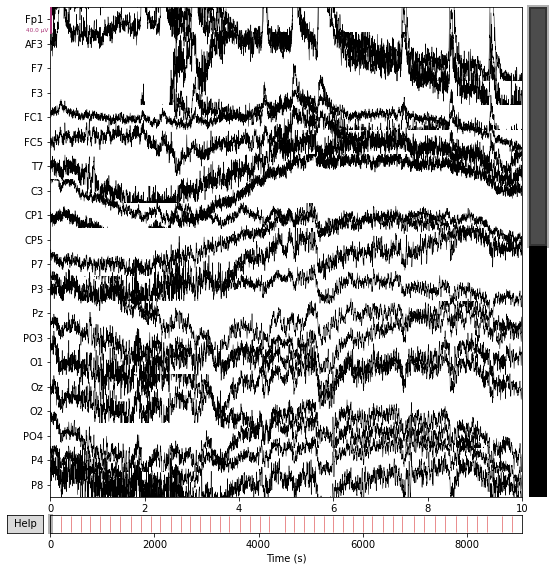

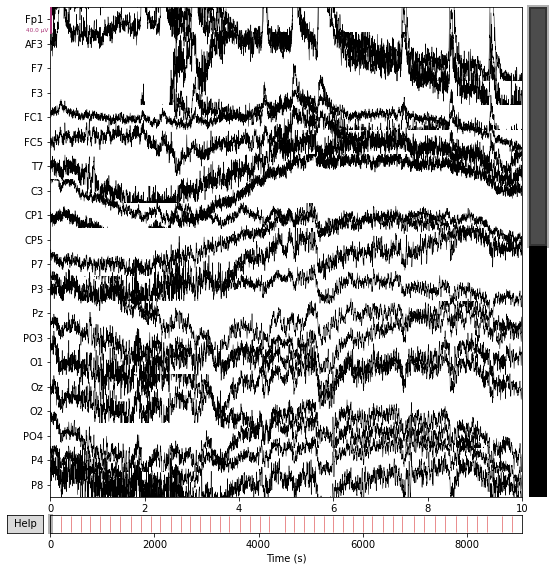

In [ ]:
raw_all.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


<ipython-input-19-3a26be675050>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_all.plot_psd()


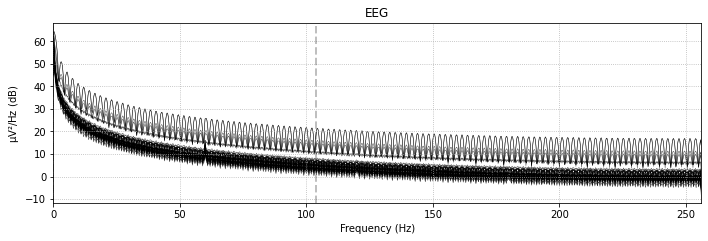

In [ ]:
raw_all.plot_psd()